In [3]:
# ==============================================================================
# Step 1: Import All Necessary Libraries
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle # Import the pickle library for saving objects
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Import metrics for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

sns.set_style("whitegrid")
print("Libraries imported successfully!")



Libraries imported successfully!


In [ ]:

# ==============================================================================
# Step 2: Load and Prepare the Data
# ==============================================================================
try:
    df = pd.read_csv('phishing_dataset_features.csv') #prepare phishing_dataset_features either Download from Drive or Prepare by Using COde in ProcessData Folder
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'phishing_dataset_features.csv' not found. Please make sure the file is in the same directory.")
    exit()

X = df.drop('Type', axis=1)
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Data split into training and testing sets.")

# --- Scale the Feature Data ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Data has been scaled successfully!")

# --- Save the scaler object ---
# This is crucial for preprocessing new data in your app
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
print("Scaler object saved to scaler.pkl")


Dataset loaded successfully!
Data split into training and testing sets.
Data has been scaled successfully!
Scaler object saved to scaler.pkl


In [5]:
# ==============================================================================
# Step 3: Define, Train, Evaluate, and SAVE the Models
# ==============================================================================
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
import pickle, pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Linear SVM": LinearSVC(random_state=42, max_iter=5000),
    "SGD Classifier (Linear SVM)": SGDClassifier(loss="hinge", random_state=42, max_iter=2000),
    "XGBoost": XGBClassifier(random_state=42, eval_metric="logloss")
}

results = {}

# Loop through each model
for model_name, model in models.items():
    print(f"\n--- Training {model_name} ---")

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Save the trained model to a file
    filename = f"{model_name.replace(' ', '_').lower()}_model.pkl"
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved to {filename}")

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Store performance metrics
    results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    }
    print(f"{model_name} trained and evaluated.")


--- Training Logistic Regression ---
Model saved to logistic_regression_model.pkl
Logistic Regression trained and evaluated.

--- Training Decision Tree ---
Model saved to decision_tree_model.pkl
Decision Tree trained and evaluated.

--- Training Random Forest ---
Model saved to random_forest_model.pkl
Random Forest trained and evaluated.

--- Training Linear SVM ---
Model saved to linear_svm_model.pkl
Linear SVM trained and evaluated.

--- Training SGD Classifier (Linear SVM) ---
Model saved to sgd_classifier_(linear_svm)_model.pkl
SGD Classifier (Linear SVM) trained and evaluated.

--- Training XGBoost ---
Model saved to xgboost_model.pkl
XGBoost trained and evaluated.


In [6]:

# ==============================================================================
# Step 4: Display Results and Identify the Best Model
# ==============================================================================
results_df = pd.DataFrame(results).T

print("\n" + "="*50)
print("           MODEL PERFORMANCE COMPARISON")
print("="*50)
print(results_df)

# --- Find and save the best model ---
best_model_name = results_df['Accuracy'].idxmax()
best_model_accuracy = results_df['Accuracy'].max()
print(f"\n🏆 The Best Performing Model is: {best_model_name} with an Accuracy of {best_model_accuracy:.4f}")

# Load the best model object from the dictionary and save it with a generic name for the app
best_model = models[best_model_name]
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
print(f"Best model ('{best_model_name}') also saved as best_model.pkl for easy use in app.py")


           MODEL PERFORMANCE COMPARISON
                             Accuracy  Precision    Recall  F1-score
Logistic Regression          0.935572   0.961099  0.829257  0.890323
Decision Tree                0.965484   0.947126  0.943201  0.945159
Random Forest                0.977207   0.986210  0.940877  0.963011
Linear SVM                   0.933691   0.968380  0.816384  0.885909
SGD Classifier (Linear SVM)  0.935493   0.972861  0.818267  0.888893
XGBoost                      0.974742   0.985645  0.933499  0.958863

🏆 The Best Performing Model is: Random Forest with an Accuracy of 0.9772
Best model ('Random Forest') also saved as best_model.pkl for easy use in app.py



Generating comparison bar chart...


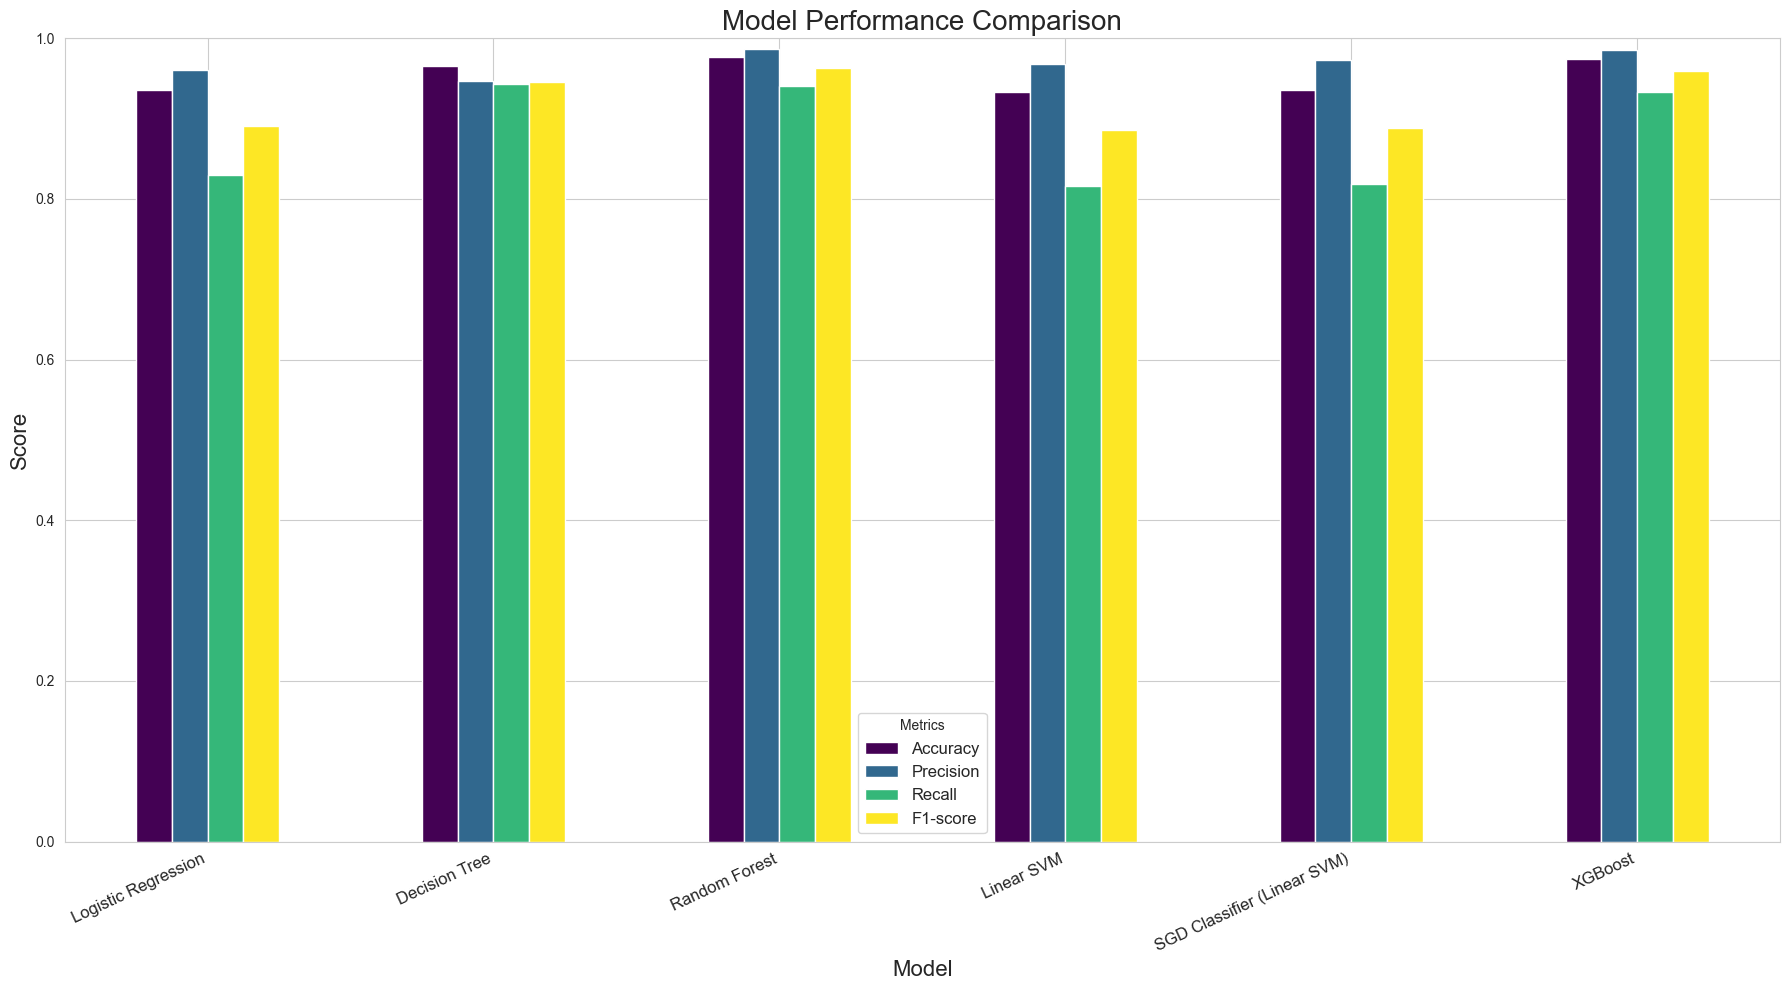


Generating comparison heatmap...


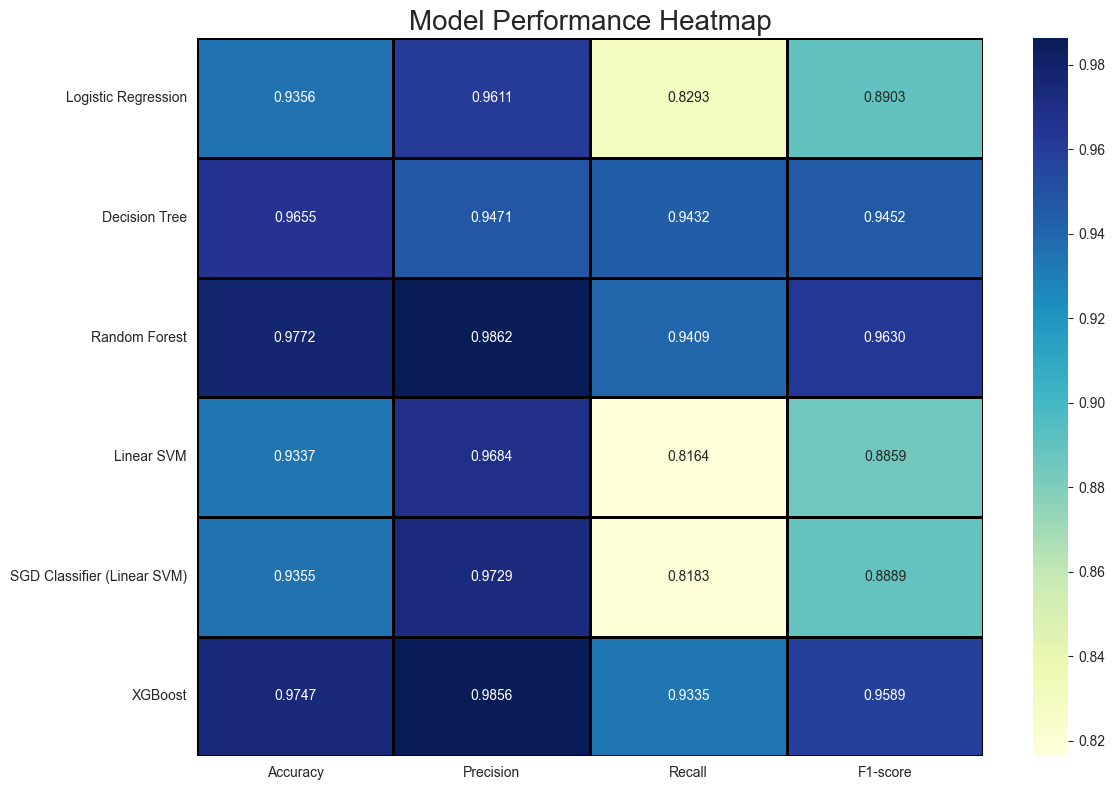



Analysis and model saving complete!


In [7]:
# ==============================================================================
# Step 5: Visualize the Comparison with Graphs
# ==============================================================================
print("\nGenerating comparison bar chart...")
results_df.plot(kind='bar', figsize=(18, 10), colormap='viridis')
plt.title("Model Performance Comparison", fontsize=20)
plt.ylabel("Score", fontsize=16)
plt.xlabel("Model", fontsize=16)
plt.xticks(rotation=25, ha="right", fontsize=12)
plt.ylim(0, 1.0)
plt.legend(title="Metrics", fontsize=12)
plt.tight_layout()
plt.savefig("model_comparison_barchart.png")
plt.show()

print("\nGenerating comparison heatmap...")
plt.figure(figsize=(12, 8))
sns.heatmap(results_df, annot=True, fmt=".4f", cmap="YlGnBu", linewidths=1, linecolor='black')
plt.title("Model Performance Heatmap", fontsize=20)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("model_comparison_heatmap.png")
plt.show()

print("\n\nAnalysis and model saving complete!")